# Light models options

## Content

- CARIBU
    - sun algo
    - virtual sensors
    - autres parametre
- RATP
    - distribution angles foliaires
    - tesselation sur la grille
    - autre paramètres
    
## Introduction

During our use of lightvegemanager, we added special features for each known light models. Here is a little introduction to them.

In [1]:
import os
from lightvegemanager.tool import LightVegeManager
from pgljupyter import SceneWidget
from lightvegemanager.trianglesmesh import random_triangle_generator

## CARIBU

You can provide parameters according to the light model. The parameters are stored in a dict. This is the complete parameters you can provide with CARIBU: 

```python
caribu_args = {
                    "sun algo" : "ratp",
                    "sun algo" : "caribu",

                    "caribu opt" : {
                                    band0 = (reflectance, transmittance),
                                    band1 = (reflectance, transmittance),
                                    ...
                                    },
                    "debug" : bool,
                    "soil mesh" : bool,
                    "sensors" : ["grid", dxyz, nxyz, orig, vtkpath, "vtk"]
                }
```

### Computing the sun position

In order to compute the sun position, you can use either the algorithm from RATP or CARIBU. The (x, y, z) output is formatted in CARIBU format.

In [4]:
caribu_args = { "sun algo" : "caribu" }

lighting = LightVegeManager(lightmodel="caribu", lightmodel_parameters=caribu_args)
lighting.build(geometry=[(0., 0., 0.), (1., 0., 0.), (1., 1., 1.)])
energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

sun_caribu = lighting.sun
print(sun_caribu)

(0.33506553253259913, -0.8798617206271511, -0.3370080733212115)


In [5]:
caribu_args = { "sun algo" : "ratp" }

lighting = LightVegeManager(lightmodel="caribu", lightmodel_parameters=caribu_args)
lighting.build(geometry=[(0., 0., 0.), (1., 0., 0.), (1., 1., 1.)])
energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

sun_ratp = lighting.sun
print(sun_ratp)

(0.33241183146897624, -0.8800565622452903, -0.3391206592769639)


In [7]:
dist = (sum([ (x-y)**2 for x,y in zip(sun_ratp, sun_caribu) ])) ** (1/2)
print("euclidean dist = ",dist," m")

euclidean dist =  0.003397515564596359  m


### Grid of virtual sensors

If you can to match a grid of voxels, you can generate a set of virtual sensors following a 3D grid. You need to precise the dimension of the grid:
- dxyz: `[dx, dy, dz]` size of one voxel
- nxyz: `[nx, ny, nz]` number of voxels on each xyz axis
- orig: `[0x, 0y, 0z]` origin point of the grid

Optionnaly, you can write a geometric visualisation of the sensors in VTK format. You need to provide the file path and the flag `"vtk"`.

In [2]:
# grid dimensions
dxyz = [1.] * 3
nxyz = [5, 5, 7]
orig = [0.] * 3

In [3]:
# random triangles
nb_triangles = 50
spheresize = (1., 0.3) # vertices of triangles are the sphere surface
triangles = []
for i in range(nb_triangles):
    triangles.append(random_triangle_generator(worldsize=(0., 5.), spheresize=spheresize))

In [4]:
caribu_args = { "sensors" : ["grid", dxyz, nxyz, orig] }

lighting = LightVegeManager(lightmodel="caribu", lightmodel_parameters=caribu_args, environment={"infinite":True})
lighting.build(geometry=triangles)

You can visualize the grid of sensors with plantGL through the method `plantGL_sensors`

In [13]:
SceneWidget(lighting.plantGL_sensors(), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': 'rpNaRspB7H0J2oKjhBfYykU71', 'data': b'x\xda\x85\x9a\xf9\xba\x15G…

The lighting results are stored in `sensors_outputs`

In [17]:
energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

print(lighting.sensors_outputs)

{'par': {0: 0.51834194067706, 1: 0.5308753998657116, 2: 0.6356410071880358, 3: 0.6280440745835342, 4: 0.7348723244391282, 5: 0.8377871001112634, 6: 0.4617251984176415, 7: 0.495129715697577, 8: 0.6131363817804785, 9: 0.5687714360698057, 10: 0.7322514236236515, 11: 0.8691497441835251, 12: 0.501409869368752, 13: 0.5802620746019611, 14: 0.5684306740502441, 15: 0.5448581816686048, 16: 0.7425834546380425, 17: 0.9448173795583968, 18: 0.48838057941884705, 19: 0.6124255210438949, 20: 0.5122986569042225, 21: 0.5196097528711219, 22: 0.6537519378903659, 23: 0.97910108961367, 24: 0.45924012286835925, 25: 0.5461410549684866, 26: 0.551527499861868, 27: 0.6180217890182801, 28: 0.6108037693496773, 29: 0.9533450759609043, 30: 0.47920650612455634, 31: 0.48509765917006636, 32: 0.4551374400234053, 33: 0.5855859239206206, 34: 0.7597544084095198, 35: 0.8641678490671126, 36: 0.4860121934865708, 37: 0.43959299789620904, 38: 0.43956593364806973, 39: 0.4036644342974864, 40: 0.7638839031112808, 41: 0.900735190584

You can also visualize the results in the plantGL scene

In [18]:
SceneWidget(lighting.plantGL_sensors(light=True), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': '5oUEYlG3YRLDXmFUN2Lt207uh', 'data': b'x\xda\x8d\x9by\x9f\x16G\x1…

In [15]:
SceneWidget(lighting.plantGL_sensors(light=True) + lighting.plantGL_nolight(), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': 'JRXUARzeztEqD2KcWxWb1bEoI', 'data': b'x\xda\x8d\x9c\t\x98\x16\xc…

### Other parameters

In additional features, you can activate the debug mode in CARIBU, which describe the internal steps.

In [20]:
caribu_args = { "debug" : True }

lighting = LightVegeManager(lightmodel="caribu", lightmodel_parameters=caribu_args)
lighting.build(geometry=[(0., 0., 0.), (1., 0., 0.), (1., 1., 1.)])

energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

Prepare scene 1
done


FileNotFoundError: [Errno 2] No such file or directory: './caribuscene_3041942304848\\cscene.can'

You can also use the soilmesh option and get the lighting hitting the soil. The method `soilenergy` get you access to its result.

In [23]:
caribu_args = { "soil mesh" : True }

lighting = LightVegeManager(lightmodel="caribu", lightmodel_parameters=caribu_args)
lighting.build(geometry=[(0., 0., 0.), (1., 0., 0.), (1., 1., 1.)])

energy = 500.
hour = 15
day = 264
lighting.run(energy=energy, hour=hour, day=day)

print(lighting.soilenergy)

{'Qi': 0.6750540873627096, 'Einc': 0.6750540873627096}


## RATP

```python
ratp_args = {
                # Grid specifications
                "voxel size" : [dx, dy, dz],
                "voxel size" : "dynamic",
                
                "full grid" : bool,

                "origin" : [xorigin, yorigin, zorigin],
                "origin" : [xorigin, yorigin],

                "number voxels" : [nx, ny, nz],
                "grid slicing" : "ground = 0."
                "tesselation level" : int

                # Leaf angle distribution
                "angle distrib algo" : "compute global",
                "angle distrib algo" : "compute voxel",
                "angle distrib algo" : "file",

                "nb angle classes" : int,
                "angle distrib file" : filepath,

                # Vegetation type
                "soil reflectance" : [reflectance_band0, reflectance_band1, ...],
                "reflectance coefficients" : [reflectance_band0, reflectance_band1, ...],
                "mu" : [mu_scene0, mu_scene1, ...]
            }
```

### Leaf angle distribution

Leaf angle distribution can be generated in 3 ways:
- from a file, one distribution per specy
- global and dynamically, it generates a distribution from a triangles mesh for each specy
- per voxel and dynamically, it generates a distribution from the triangles located in each voxel

In [8]:
# random triangles
nb_triangles = 50
spheresize = (1., 0.3) # vertices of triangles are the sphere surface
worldsize = (0., 5.)
triangles = [random_triangle_generator(worldsize=worldsize, spheresize=spheresize) for i in range(nb_triangles)]

#### File

You need the flag `"file"` and to specify the file path.

In [3]:
filepath = os.path.join(os.path.dirname(os.path.abspath("")), "data", "luzerne_angle_distrib.data")
ratp_parameters = { "angle distrib algo" : "file", "angle distrib file" : filepath }

# initialize the instance
lighting = LightVegeManager(lightmodel="ratp", lightmodel_parameters=ratp_parameters)

# build the scene
lighting.build(geometry=triangles)

print(lighting.leafangledistribution)

{'global': [[0.1382, 0.1664, 0.1972, 0.1925, 0.1507, 0.0903, 0.0425, 0.0172, 0.005]]}


#### Global distribution

You need the flag `"compute global"` and to specify the number of angle classes you need.

In [5]:
ratp_parameters = { "angle distrib algo" : "compute global", "nb angle classes" : 9 }

# initialize the instance
lighting = LightVegeManager(lightmodel="ratp", lightmodel_parameters=ratp_parameters)

# build the scene
lighting.build(geometry=triangles)

print(lighting.leafangledistribution)

{'global': [[0.06155178223916461, 0.12499042395940269, 0.06445789476401936, 0.1187479400647726, 0.21074770572428322, 0.12460435598932129, 0.1405535570495526, 0.01797247992923503, 0.13637386028024864]]}


#### Local distribution

You need the flag `"compute voxel"` and to specify the number of angle classes you need. You will get one distribution for each voxel of your grid and each specy.

In [11]:
ratp_parameters = { 
                    "voxel size" : [1., 1., 1.],
                    "angle distrib algo" : "compute voxel", 
                    "nb angle classes" : 9
                    }

# initialize the instance
lighting = LightVegeManager(lightmodel="ratp", lightmodel_parameters=ratp_parameters)

# build the scene
lighting.build(geometry=triangles)

print("Global")
print(lighting.leafangledistribution["global"])
print("\n\n Local")
for a in lighting.leafangledistribution["voxel"]:
    print(a[0])

Global
[[0.09035031695555507, 0.08761577143411951, 0.056255001524189746, 0.0753746859951702, 0.27007435951575953, 0.12360752121946102, 0.1302826782705683, 0.113942659680832, 0.05249700540434461]]


 Local
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.55943496 0.         0.44056504 0.         0.         0.
 0.         0.         0.        ]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0.         0.81407011 0.         0.18592989 0.         0.
 0.         0.         0.        ]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.         0.00742362 0.         0.         0.         0.
 0.30061391 0.69196247 0.        ]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0

For visualization of the situation

In [14]:
SceneWidget(lighting.plantGL_nolight(printtriangles=True, printvoxels=True), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': 'VXiNJUbqifCr9iQOhQ9okiBdG', 'data': b'x\xda\x8d[\tx\x14E\xda\x1e…

### Triangles tesselation in a grid

You can reduce the error while transferring a triangle mesh to a voxel mesh by subdividing triangles across multiple voxels.

<div>
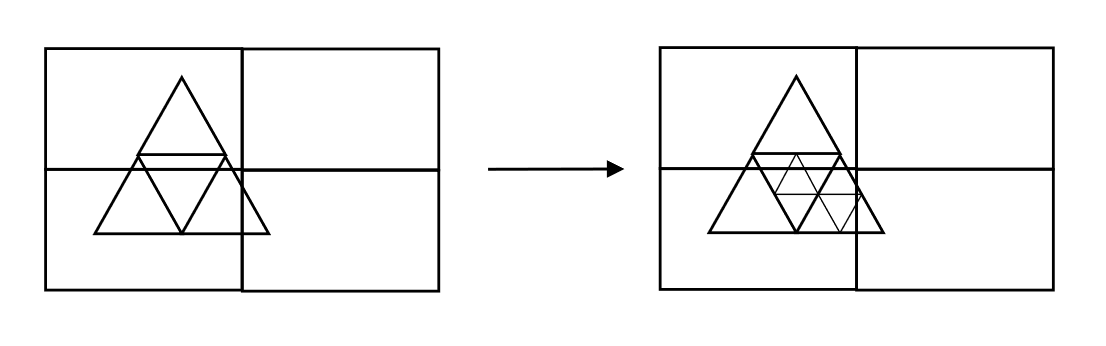
</div>

You only need to precise how many times you want to subdivide the triangles.

In [18]:
ratp_parameters = { "tesselation level" : 7 }

# initialize the instance
lighting = LightVegeManager(lightmodel="ratp", lightmodel_parameters=ratp_parameters)

# build the scene
lighting.build(geometry=triangles)

SceneWidget(lighting.plantGL_nolight(printtriangles=True, printvoxels=False), 
            position=(-2.5, -2.5, 0.0), 
            size_display=(600, 400), 
            plane=True, 
            size_world = 10, 
            axes_helper=True)

SceneWidget(axes_helper=True, scenes=[{'id': 'gV833JQsWfuarucHtF2W2o3IM', 'data': b'x\xda\x95[\x0bX\x15\xd5\x1…

### Other parameters

By default, the number of voxels is dynamically computed following the voxel size and mesh limits, but you can force its number. 

Voxel size can also be dynamically computed and is based on 3 times the longest triangle.